In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.read_csv('u.data')

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [11]:
df = pd.read_csv('u.data', sep = '\t', names = ['user_id','item_id','rating','timestamp'])

In [12]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [17]:
title = pd.read_csv('Movie_Id_Titles')

In [18]:
title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [19]:
movie_ratings = pd.merge(df, title,on='item_id')

In [21]:
movie_ratings.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [32]:
n_users = movie_ratings.user_id.nunique()
n_movies = movie_ratings.item_id.nunique()

print('Number of users: '+str(n_users))
print('Number of movies: '+str(n_movies))

Number of users: 944
Number of movies: 1682


In [36]:
movie_ratings.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [37]:
movie_ratings.groupby('title')['user_id'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: user_id, dtype: int64

In [45]:
ratings = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())

In [47]:
ratings['num_of_ratings'] = movie_ratings.groupby('title')['user_id'].count()

In [48]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


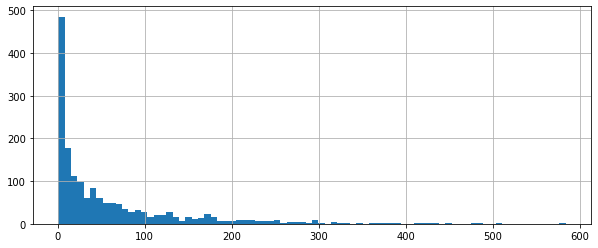

In [52]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=80)

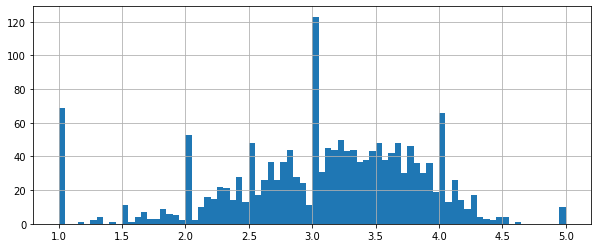

In [53]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=80)

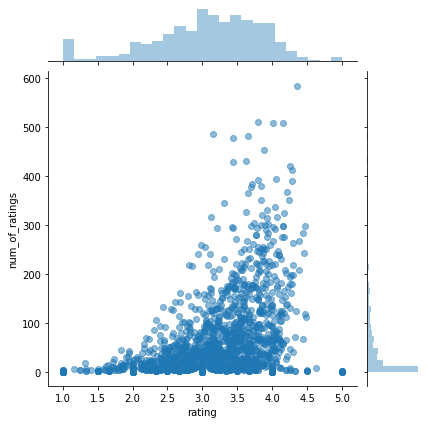

In [56]:
import seaborn as sns
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

In [61]:
movie_matrix = movie_ratings.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [62]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
ratings.sort_values('num_of_ratings', ascending = False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [65]:
# let's try to recommend a movie to a person who likes the movie 'Star Wars'

In [67]:
star_wars_user_ratings = movie_matrix['Star Wars (1977)']

In [72]:
similar_to_starWars = movie_matrix.corrwith(star_wars_user_ratings)

In [73]:
corr_similar_to_starWars = pd.DataFrame(similar_to_starWars, columns = ['Correlation'])

In [75]:
corr_similar_to_starWars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [78]:
corr_similar_to_starWars.sort_values('Correlation', ascending = False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [79]:
corr_StarWars = corr_similar_to_starWars.join(ratings['num_of_ratings'])

In [82]:
corr_StarWars[corr_StarWars['num_of_ratings']>100].sort_values('Correlation', ascending = False)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


From this, we can recommend movies like 'Empire Strikes Back', 'Return of the Jedi', and 'Raiders of the Lost Ark', etc (movies with highest correlation); to ones who liked Star Wars